In [2]:
# import Data Manipulation Libraries
import pandas as pd
import numpy as np

# import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# import warning
import warnings
warnings.filterwarnings("ignore")

# import Logging
import logging
logging.basicConfig(level= logging.INFO,
                    filename = "Model.log",
                    filemode = "w",
                    format= "%(asctime)s - %(levelname)s - %(message)s", force = True)

# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [3]:
logging.info("Importing Data")

In [4]:
url = "https://raw.githubusercontent.com/Digraskarpratik/Spaceship_Titanic_Prediction/refs/heads/main/notebooks/train.csv"

df = pd.read_csv(url)

df.sample(frac = 1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1421,1500_06,Earth,True,G/230/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Bobbyn Barbes,True
5228,5578_01,Earth,True,G/892/P,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Verney Gainebergan,True
3729,4001_03,Earth,True,G/659/S,PSO J318.5-22,4.0,False,0.0,0.0,0.0,0.0,0.0,Leahy Lowelliott,True
3982,4252_01,Earth,False,F/795/S,TRAPPIST-1e,15.0,False,156.0,1.0,1132.0,192.0,33.0,Annon Knoxtones,True
5073,5420_01,Earth,False,F/1036/S,TRAPPIST-1e,39.0,False,0.0,829.0,0.0,1.0,0.0,Gayla Merrelliss,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8285,8848_01,NaN,False,F/1824/P,TRAPPIST-1e,19.0,False,1037.0,0.0,40.0,0.0,0.0,Leos Lacke,True
2823,3045_01,Earth,True,G/480/S,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Helean Hestes,False
2906,3142_02,Mars,False,F/591/S,TRAPPIST-1e,32.0,False,1087.0,0.0,71.0,0.0,0.0,Fres Cla,False
5564,5927_05,Europa,True,B/201/P,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Taurak Ballexy,True


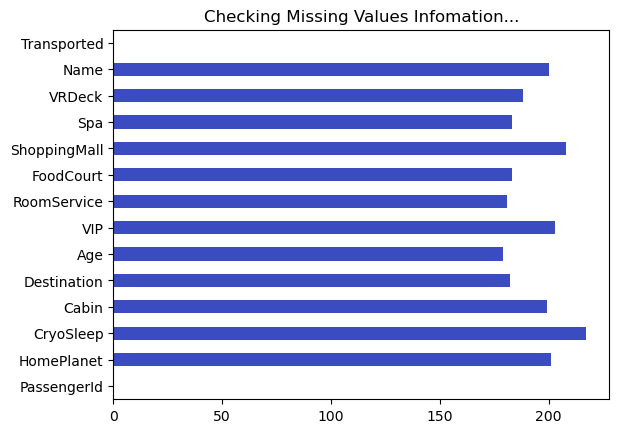

In [5]:
df.isnull().sum().plot(kind = 'barh',cmap = "coolwarm" )
plt.title("Checking Missing Values Infomation...")
plt.show()

In [6]:
df["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

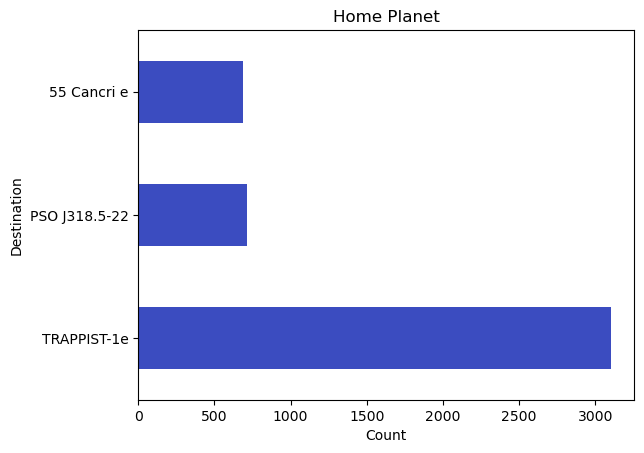

In [7]:
df[df["HomePlanet"] == "Earth"]["Destination"].value_counts().plot(kind = "barh", cmap= "coolwarm")
plt.title("Home Planet")
plt.xlabel ("Count")
plt.ylabel("Destination")
plt.show()

In [8]:
df.drop(["PassengerId", "Name", "VIP"], axis=1 , inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [10]:
# Categorical Column
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)


# Numerical Column
df['Age'].fillna(df['Age'].median(), inplace=True)
df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)
# Fill categorical columns with mode
# df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [12]:
df['HomePlanet'].apply(type).value_counts()

HomePlanet
<class 'str'>    8693
Name: count, dtype: int64

In [13]:
df['HomePlanet'] = df['HomePlanet'].astype(str)
df['CryoSleep'] = df['CryoSleep'].astype(str)
df['Cabin'] = df['Cabin'].astype(str)
df['Destination'] = df['Destination'].astype(str)

In [14]:
# df.drop(["PassengerId", "Name"], axis=1 , inplace= True)

In [15]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [ ]:
from collections import OrderedDict

stats = []

# Descriptive Statistics

for col in df.columns:
    if df[col].dtype  !=  "object" and df[col].dtype != "bool":
        numerical_stats = OrderedDict({
            "feature" : col,
            "Minimum" : df[col].min(),
            "Mean" : df[col].mean(),
            "Median" : df[col].median(),
            "Maximum" : df[col].max(),
            "Mode" : df[col].mode()[0] if not df[col].mode().empty else None,
            "25%" : df[col].quantile(0.25),
            "75%" : df[col].quantile(0.75),
            "Standard Deviation" : df[col].std(),
            "Skwessness" : df[col].skew(),
            "Kurtosis" : df[col].kurt() 
            
        })
        stats.append(numerical_stats)

# Convert To DataFrame
report = pd.DataFrame(stats)

# Outliers Indentification
outlier_label = []

for col in report["feature"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR # Lower Whisker Line
    UW = Q3 + 1.5 * IQR # Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Oulier Comment"] = outlier_label

# Checking Report
report.style.background_gradient(subset= ["Minimum","Mean","Median", "Maximum", "Mode", "25%", "75%", "Standard Deviation", "Skwessness", "Kurtosis"], cmap="coolwarm")

,feature,Minimum,Mean,Median,Maximum,Mode,25%,75%,Standard Deviation,Skwessness,Kurtosis,Oulier Comment
0,Age,0.000000,28.790291,27.000000,79.000000,27.000000,20.000000,37.000000,14.341404,0.431102,0.169570,Has Outliers
1,RoomService,0.000000,220.009318,0.000000,14327.000000,0.000000,0.000000,41.000000,660.519050,6.397766,66.577452,Has Outliers
2,FoodCourt,0.000000,448.434027,0.000000,29813.000000,0.000000,0.000000,61.000000,1595.790627,7.177515,74.856189,Has Outliers
3,ShoppingMall,0.000000,169.572300,0.000000,23492.000000,0.000000,0.000000,22.000000,598.007164,12.763842,336.017352,Has Outliers
4,Spa,0.000000,304.588865,0.000000,22408.000000,0.000000,0.000000,53.000000,1125.562559,7.716450,82.920686,Has Outliers
5,VRDeck,0.000000,298.261820,0.000000,24133.000000,0.000000,0.000000,40.000000,1134.126417,7.904554,87.883437,Has Outliers


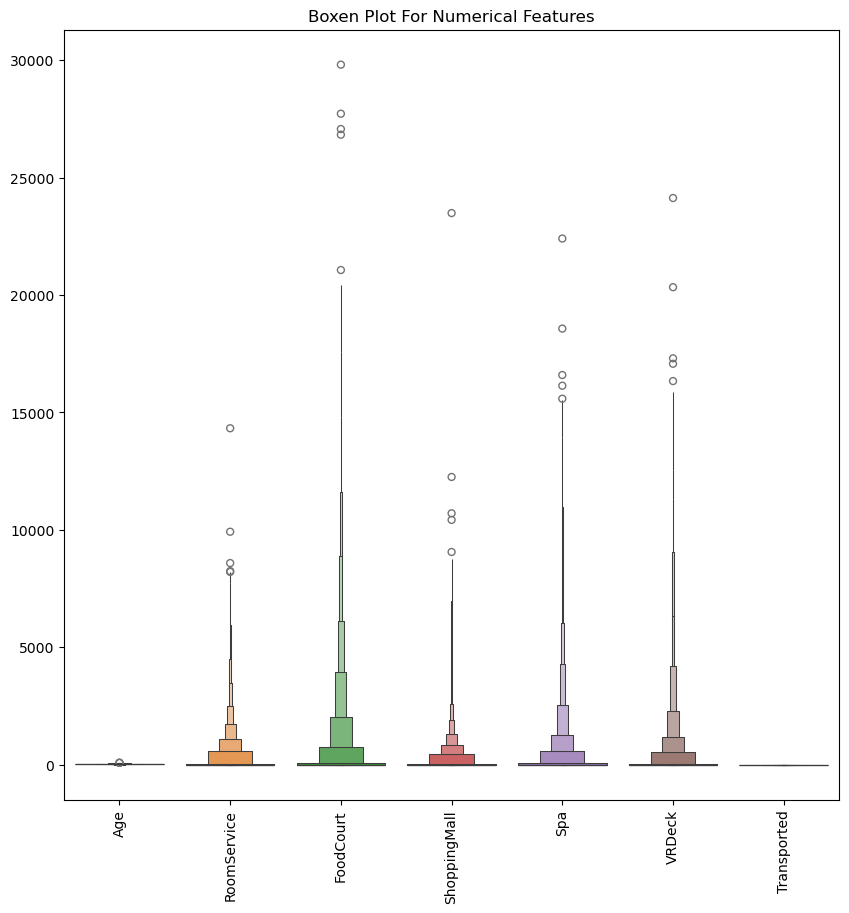

In [18]:
# Checking Boxen Plot
plt.figure(figsize = (10, 10))
sns.boxenplot(data= df)
plt.xticks(rotation = 90 )
plt.title("Boxen Plot For Numerical Features")
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [20]:
# Replacing Outliers With Median Strategy

for col in df.select_dtypes(include= "number").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()
    
    if outlier_count > 0 :
        replacement = df[col].median()
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with Median.")
    else:
        print(f"No Outliers found in {col}.")

Replaced 162 outliers in 'Age' with Median.
Replaced 1906 outliers in 'RoomService' with Median.
Replaced 1916 outliers in 'FoodCourt' with Median.
Replaced 1879 outliers in 'ShoppingMall' with Median.
Replaced 1833 outliers in 'Spa' with Median.
Replaced 1849 outliers in 'VRDeck' with Median.


In [21]:
logging.info("Outliers Detection and Replacing of Outlier Activity Done Using IQR Method")

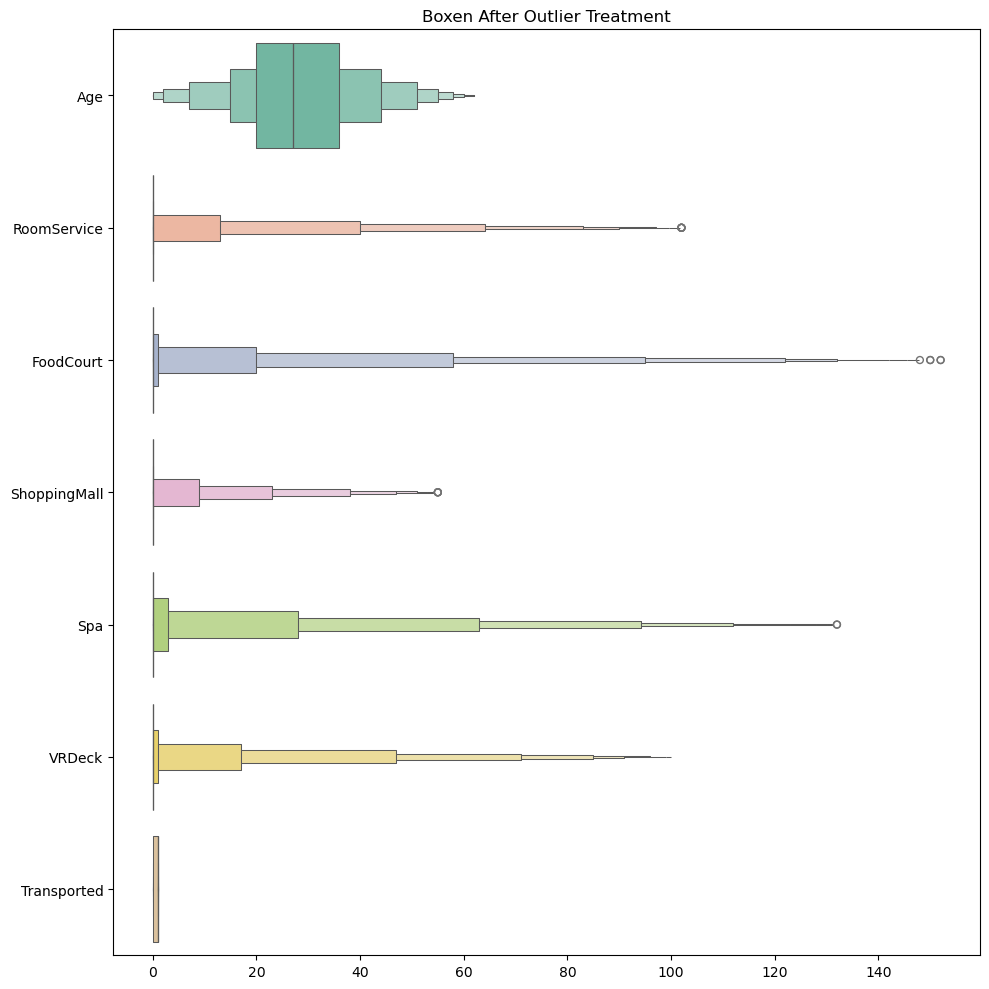

In [22]:
plt.figure(figsize = (10, 10))
sns.boxenplot(data= df, orient="h", palette= "Set2")
plt.title("Boxen After Outlier Treatment")
plt.tight_layout()
plt.show()

In [23]:
le =  LabelEncoder()

df["HomePlanet"] = le.fit_transform(df["HomePlanet"])
df["CryoSleep"] = le.fit_transform(df["CryoSleep"])
df["Cabin"] = le.fit_transform(df["Cabin"])
df["Destination"] = le.fit_transform(df["Destination"])
# df["Transported"] = le.fit_transform(df["Transported"])
df["Transported"] = df["Transported"].astype(int)

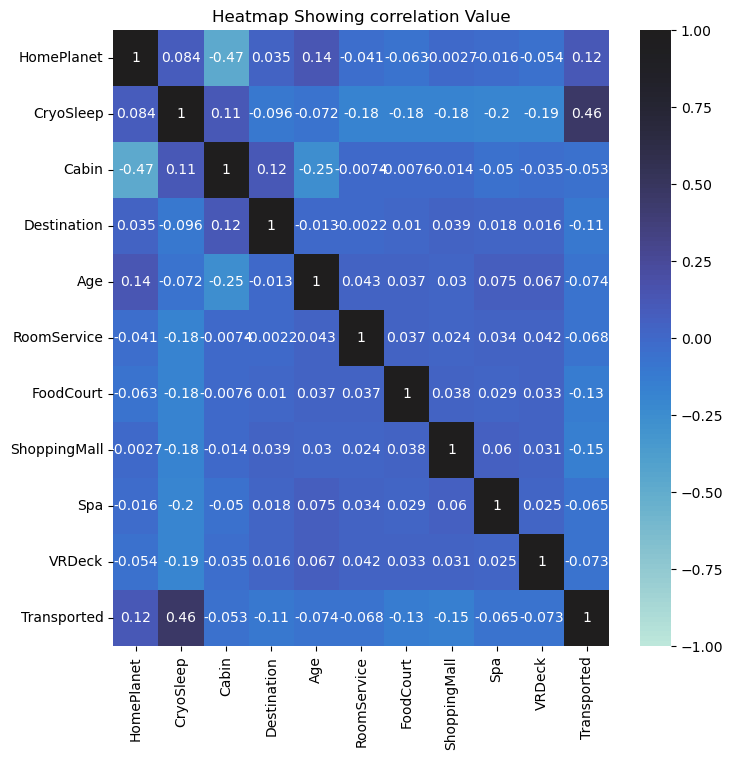

In [24]:
df.ax = plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, center= True, vmax = 1, vmin = -1)
plt.title("Heatmap Showing correlation Value")
plt.show()

In [25]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2184,2,24.0,0.0,9.0,25.0,0.0,44.0,1
2,1,0,1,2,58.0,43.0,0.0,0.0,0.0,49.0,0
3,1,0,1,2,33.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,2186,2,16.0,0.0,70.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,0.0,0.0,0.0,0.0,74.0,0
8689,0,1,5280,1,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,5285,2,26.0,0.0,0.0,0.0,1.0,0.0,1
8691,1,0,2131,0,32.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:


def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop("Transported",axis = 1))

,features,VIF_Values
3,Destination,3.93
4,Age,3.67
2,Cabin,3.37
0,HomePlanet,1.95
1,CryoSleep,1.81
8,Spa,1.12
9,VRDeck,1.11
7,ShoppingMall,1.10
5,RoomService,1.09
6,FoodCourt,1.09


In [27]:
# Using PCA Concept
# Step1 : Standard the Data

scalerRS = RobustScaler()

X_train = scalerRS.fit_transform(df)

for i in range (1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio : ", evr)
print("Number of Components selected: ", pcs)

# Step 3 : Apply PCA

pca= PCA(n_components=pcs)
pca_data = pca.fit_transform(X_train)

# Step 4 :  Create DataFrame

pca_columns = [f"PC {j+1}" for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns= pca_columns)

# Step 5 : Join Target Columns with PCA :
pca_df = pca_df.join(df["Transported"], how = "left")
pca_df  
  
# Step 2 : Determine Number of Components to retain 90% variance

Explained Variance Ratio :  [0.32749195 0.63447836 0.80447546 0.94930979]
Number of Components selected:  4


,PC 1,PC 2,PC 3,PC 4,Transported
0,-7.326836,-1.111796,-3.716756,-1.845168,0
1,3.211836,-6.550825,38.808483,-12.762717,1
2,-1.514167,-0.994139,54.078719,27.705841,0
3,-7.328086,-1.112353,-3.718222,-1.845652,0
4,47.004688,-45.125538,-6.022743,-4.614820,1
...,...,...,...,...,...
8688,-2.613582,-1.201974,67.825801,-20.081257,0
8689,-7.338168,-1.117980,-3.728286,-1.848683,0
8690,-6.707018,-0.337224,-3.770193,-1.877907,1
8691,-7.330644,-1.113688,-3.720838,-1.844631,0


In [28]:
logging.info("Model Building...")

In [29]:
X = pca_df.drop(["Transported"], axis = 1)
y = pca_df["Transported"]

def model_build(model_name, model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    accuracy_score_model = accuracy_score(y_test, y_pred_model)
    result = [model_name, (f"{round(accuracy_score_model * 100)}%")]
    return result

model_build(model_name = "RandomForestClassifier", model = RandomForestClassifier(random_state=42), X = X, y =y)

['RandomForestClassifier', '85%']

In [30]:
def multiple_model(X, y):
    col_names = ["Model Name", "accuracy_score"]
    result = pd.DataFrame(columns= col_names)
    result.loc[len(result)] = model_build("RandomForestClassifier", RandomForestClassifier(),X, y)
    result.loc[len(result)] = model_build("DecisionTreeClassifier", DecisionTreeClassifier(), X, y)
    result.loc[len(result)] = model_build("KNN", KNeighborsClassifier(), X, y)
    result.loc[len(result)] = model_build("Gradient Boost", GradientBoostingClassifier(), X, y)
    result.loc[len(result)] = model_build("ADA Boost", AdaBoostClassifier(), X, y)
    result.loc[len(result)] = model_build("XG Boost", XGBClassifier(), X, y)
    return result.sort_values(by="accuracy_score", ascending=False)

multiple_model(X= X, y= y)

,Model Name,accuracy_score
0,RandomForestClassifier,86%
2,KNN,86%
5,XG Boost,86%
3,Gradient Boost,84%
1,DecisionTreeClassifier,83%
4,ADA Boost,81%


In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

X = pca_df.drop(["Transported"], axis = 1)
y = pca_df["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

scaler = SelectKBest(score_func=f_classif, k=10)
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)
X_Train_select = scaler.fit_transform(X_train, y_train)
X_test_Select = scaler.transform(X_test)

RF = RandomForestClassifier()

RF.fit(X_Train_select, y_train)

y_pred_RF = RF.predict(X_test_Select)

accuracy_score_RF = accuracy_score(y_test,y_pred_RF)

print(f"accuracy Score for RandomForest Classifier: {round(accuracy_score_RF*100)}% ")

accuracy Score for RandomForest Classifier: 86% 


In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
grid.fit(X_train, y_train)
print(f"Best Accuracy from GridSearch:  {round(grid.best_score_*100)}% ")